![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [97]:
# Import the necessary packages under their aliases
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import datetime as dt
import pingouin as pg

In [98]:
# Read the "women_results.csv" and "men_results.csv" files as pandas DataFrames and store them in the women_df and men_df variables, respectively
women_df = pd.read_csv("women_results.csv")
men_df = pd.read_csv("men_results.csv")

In [99]:
# Print the head of the women_df DataFrame
print(women_df.head())

   Unnamed: 0        date home_team  ... home_score  away_score        tournament
0           0  1969-11-01     Italy  ...          1           0              Euro
1           1  1969-11-01   Denmark  ...          4           3              Euro
2           2  1969-11-02   England  ...          2           0              Euro
3           3  1969-11-02     Italy  ...          3           1              Euro
4           4  1975-08-25  Thailand  ...          3           2  AFC Championship

[5 rows x 7 columns]


In [100]:
# Print the head of the men_df DataFrame
print(men_df.head())

   Unnamed: 0        date home_team  ... home_score  away_score  tournament
0           0  1872-11-30  Scotland  ...          0           0    Friendly
1           1  1873-03-08   England  ...          4           2    Friendly
2           2  1874-03-07  Scotland  ...          2           1    Friendly
3           3  1875-03-06   England  ...          2           2    Friendly
4           4  1876-03-04  Scotland  ...          3           0    Friendly

[5 rows x 7 columns]


In [101]:
# Filter both DataFrames so as to include only official FIFA World Cup matches that took place later than 01 January 2002
women_df = women_df[(women_df["tournament"].isin(["FIFA World Cup"])) & (pd.to_datetime(women_df["date"]) > pd.to_datetime("2002-01-01"))].sort_values(by = "date")
men_df = men_df[(men_df["tournament"].isin(["FIFA World Cup"])) & (pd.to_datetime(men_df["date"]) > pd.to_datetime("2002-01-01"))].sort_values(by = "date")

# Add a "total_score" to each DataFrame computing the total number of goals scored for every match
women_df["total_score"] = women_df["home_score"] + women_df["away_score"]
men_df["total_score"] = men_df["home_score"] + men_df["away_score"]

In [102]:
# Print the head of the women_df DataFrame again
print(women_df.head())

      Unnamed: 0        date  ...      tournament total_score
1600        1600  2003-09-20  ...  FIFA World Cup           3
1601        1601  2003-09-20  ...  FIFA World Cup           2
1602        1602  2003-09-20  ...  FIFA World Cup           5
1603        1603  2003-09-20  ...  FIFA World Cup           6
1604        1604  2003-09-21  ...  FIFA World Cup           4

[5 rows x 8 columns]


In [103]:
# Print the head of the men_df DataFrame again
print(men_df.head())

       Unnamed: 0        date  ...      tournament total_score
25164       25164  2002-05-31  ...  FIFA World Cup           1
25165       25165  2002-06-01  ...  FIFA World Cup           8
25166       25166  2002-06-01  ...  FIFA World Cup           2
25167       25167  2002-06-01  ...  FIFA World Cup           3
25168       25168  2002-06-02  ...  FIFA World Cup           1

[5 rows x 8 columns]


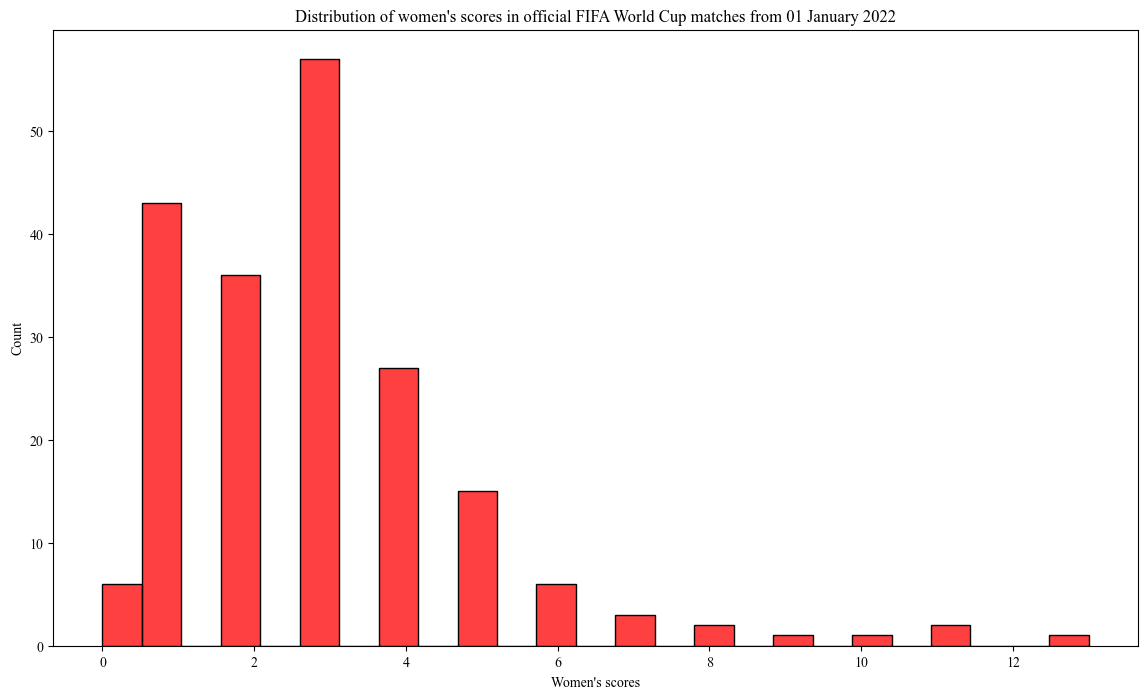

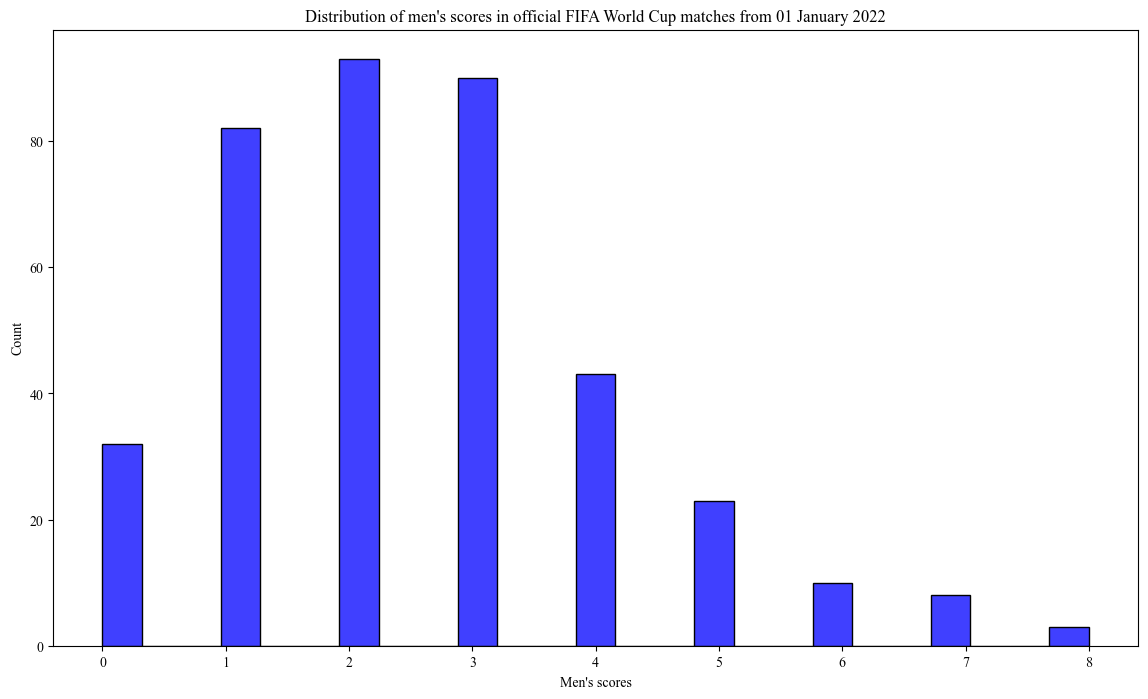

In [104]:
# Perform data visualization on the "total_score" column on both the women_df and men_df DataFrames using histogram plots to check whether or not the numerical data therein satisfy the assumptions of parametric hypothesis tests
scores = pd.DataFrame({
    "women_scores" : women_df["total_score"],
    "men_scores" : men_df["total_score"]
})

plt.rcParams["font.family"] = "Times New Roman"

fig1, ax1 = plt.subplots(figsize = (14, 8))
ax1 = sns.histplot(data = scores, x = "women_scores", bins = 25, color = "r")
ax1.set(title = "Distribution of women's scores in official FIFA World Cup matches from 01 January 2022", xlabel = "Women's scores", ylabel = "Count")

fig2, ax2 = plt.subplots(figsize = (14, 8))
ax2 = sns.histplot(data = scores, x = "men_scores", bins = 25, color = "b")
ax2.set(title = "Distribution of men's scores in official FIFA World Cup matches from 01 January 2022", xlabel = "Men's scores", ylabel = "Count")
plt.show()

In [105]:
# Given the independent nature of both groups, the number of groups and the apparent non-normality of the numerical data at hand from the previous plots, apply a right-tailed unpaired non-parametric two-sample hypothesis test (in this case, the Wilcoxon-Mann-Whitney test) to determine whether or not the null hypothesis is rejected, beginning by setting the significance level alpha to 0.01
alpha = 0.01
WMU_test = pg.mwu(x = scores["women_scores"], y = scores["men_scores"], alternative = "greater")

In [106]:
# Extract the Wilcoxon-Mann-Whitney test's p-value from the "p-val" column in the WMU_test DataFrame and store it in the p_val variable
p_val = WMU_test["p-val"][0]

# Define a string that is equal to the string "reject" or "fail to reject" according to whether the p-value is less than or equal to or strictly greater than the significance level, and store the string in the result variable
result = str(np.where(p_val <= alpha, "reject", "fail to reject"))

# Define a dictionary summarising the two previously defined variables, and store it in the result_dict variable
result_dict = {"p_val" : p_val, "result" : result}

In [107]:
# Print the result_dict dictionary
print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}
